# DACON
## [공공] 서울시 따릉이 자전거 이용 예측 AI모델

### 회귀문제로 Pycaret의 AutoML을 사용하였습니다.
****

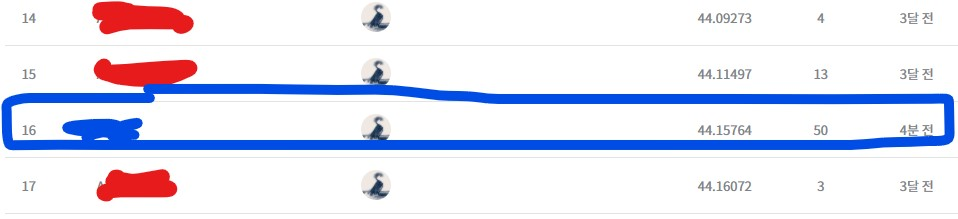

In [3]:
from IPython.display import Image
 
Image("rank.jpg")

### 별도의 전처리 과정 없이 결측값 대치, 스케일링만으로 꽤 우수한 성능을 기록하였습니다.
****

## 패키지 불러오기

In [242]:
import pandas as pd
import numpy as np
from pycaret.regression import *
from sklearn.preprocessing  import *
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

****

## 데이터 불러오기

In [286]:
train = pd.read_csv('train.csv').iloc[:, 1:]
test = pd.read_csv('test.csv').iloc[:, 1:]
submission = pd.read_csv('submission.csv')

In [287]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 10 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   hour                    1459 non-null   int64  
 1   hour_bef_temperature    1457 non-null   float64
 2   hour_bef_precipitation  1457 non-null   float64
 3   hour_bef_windspeed      1450 non-null   float64
 4   hour_bef_humidity       1457 non-null   float64
 5   hour_bef_visibility     1457 non-null   float64
 6   hour_bef_ozone          1383 non-null   float64
 7   hour_bef_pm10           1369 non-null   float64
 8   hour_bef_pm2.5          1342 non-null   float64
 9   count                   1459 non-null   float64
dtypes: float64(9), int64(1)
memory usage: 114.1 KB


In [288]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 715 entries, 0 to 714
Data columns (total 9 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   hour                    715 non-null    int64  
 1   hour_bef_temperature    714 non-null    float64
 2   hour_bef_precipitation  714 non-null    float64
 3   hour_bef_windspeed      714 non-null    float64
 4   hour_bef_humidity       714 non-null    float64
 5   hour_bef_visibility     714 non-null    float64
 6   hour_bef_ozone          680 non-null    float64
 7   hour_bef_pm10           678 non-null    float64
 8   hour_bef_pm2.5          679 non-null    float64
dtypes: float64(8), int64(1)
memory usage: 50.4 KB


In [289]:
train.corr()['count']

hour                      0.626047
hour_bef_temperature      0.619404
hour_bef_precipitation   -0.163985
hour_bef_windspeed        0.459906
hour_bef_humidity        -0.471142
hour_bef_visibility       0.299094
hour_bef_ozone            0.477614
hour_bef_pm10            -0.114288
hour_bef_pm2.5           -0.134293
count                     1.000000
Name: count, dtype: float64

****

## 결측값을 중위값, 평균값, 0, 삭제 등 다양한 방법을 시도했습니다.

### 그중에서 일단 중위값으로 진행하였습니다.

In [290]:
train.fillna(train.median(), inplace = True)
test.fillna(test.median(), inplace = True)

****
## 여러가지 스케일링 기법이 있지만 StandardScaler를 사용하였습니다.

In [291]:
scaler = StandardScaler()

In [292]:
train = pd.DataFrame(scaler.fit_transform(train.iloc[:, :-1]), columns = train.columns[:-1])
train = pd.concat([train, target], axis = 1)

In [293]:
test = pd.DataFrame(scaler.transform(test), columns = test.columns)

****
## AutoML을 적용한 부분입니다.

자세한 내용은 pycaret regression을 검색해 보시면 확인할 수 있습니다.

In [306]:
reg = setup(train, folds_shuffle = True, train_size = .9,target = 'count')
best_3 = compare_models(n_select = 3, fold = 10, sort = 'RMSE')
blended = blend_models(best_3, optimize = 'RMSE', fold = 10)
pred = predict_model(blended)
final = finalize_model(blended)
pred = predict_model(final, data = test.fillna(test.median()))

In [307]:
submission['count'] = pred['Label']

In [308]:
submission.to_csv('automl1007.csv', index = False)

# Finished!